In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
path='/content/drive/MyDrive/Colab Notebooks/Dataset/IRIS.csv'
dataset = pd.read_csv(path)
print(dataset.head(50))

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [2]:
dataset.info()
dataset[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_outcome=pd.crosstab(index=dataset["species"],  # Make a crosstab
                              columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [4]:
iris_setosa=dataset.loc[dataset["species"]=="Iris-setosa"]
iris_virginica=dataset.loc[dataset["species"]=="Iris-virginica"]
iris_versicolor=dataset.loc[dataset["species"]=="Iris-versicolor"]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

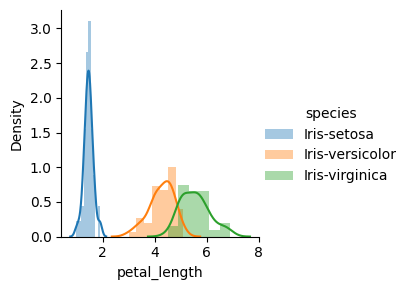

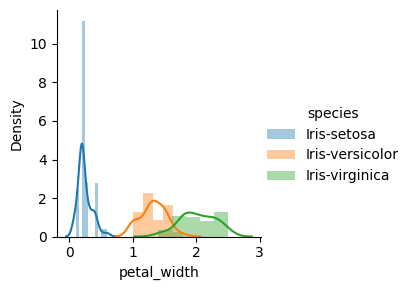

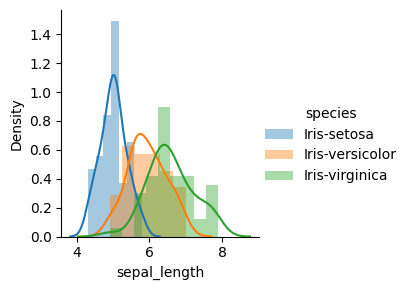

In [5]:
sns.FacetGrid(dataset,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(dataset,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(dataset,hue="species").map(sns.distplot,"sepal_length").add_legend()
plt.show()

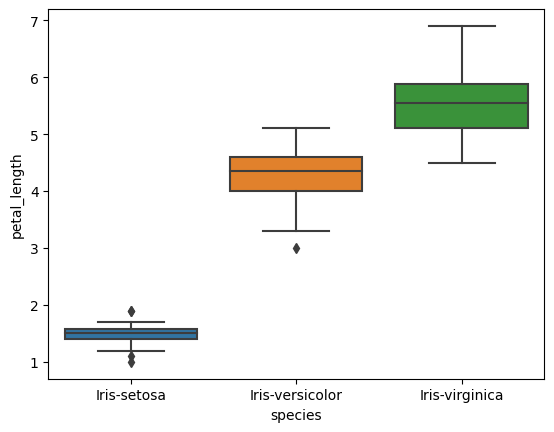

In [6]:
sns.boxplot(x="species",y="petal_length",data=dataset)
plt.show()

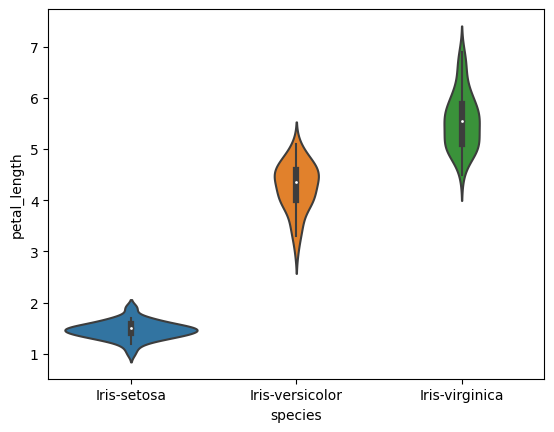

In [7]:
sns.violinplot(x="species",y="petal_length",data=dataset)
plt.show()

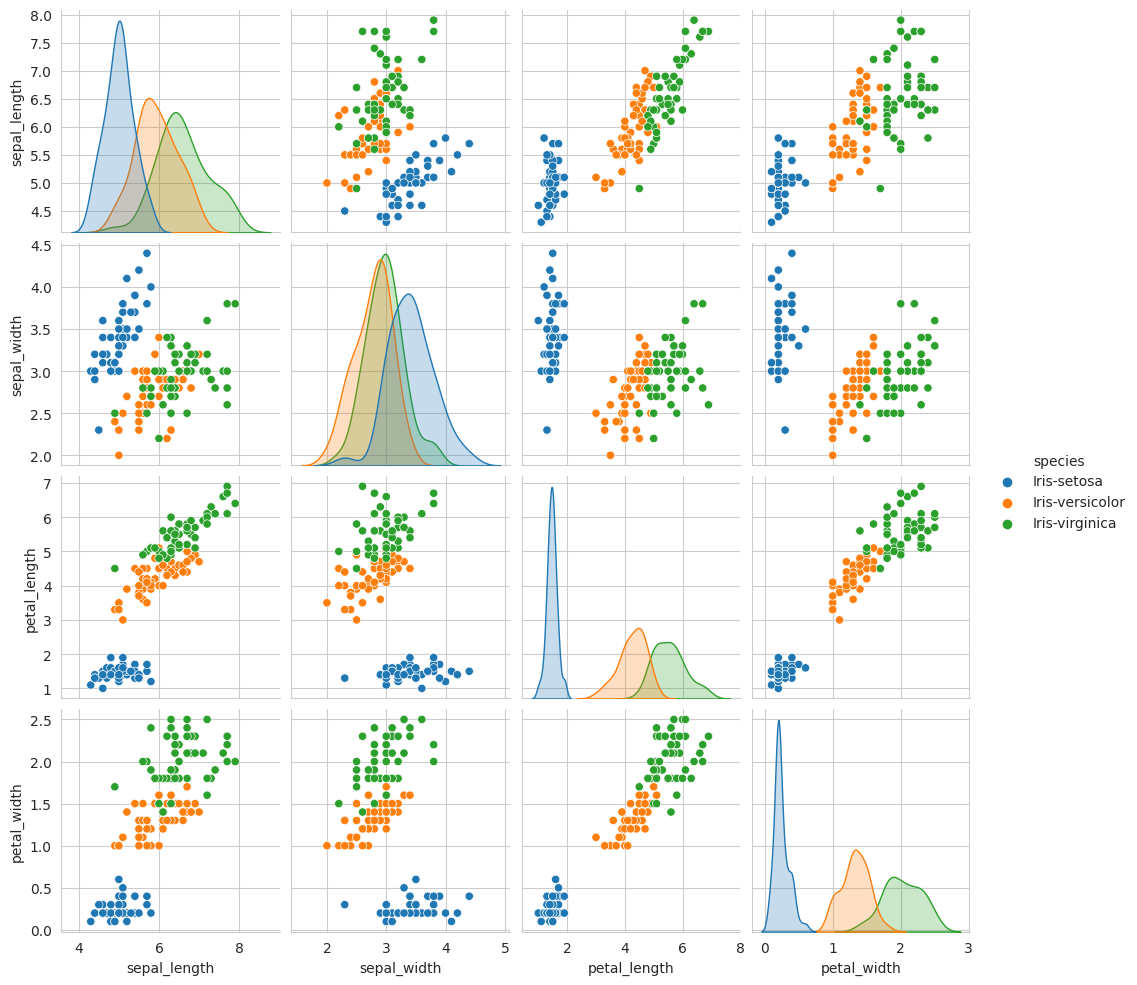

In [8]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="species");
plt.show()

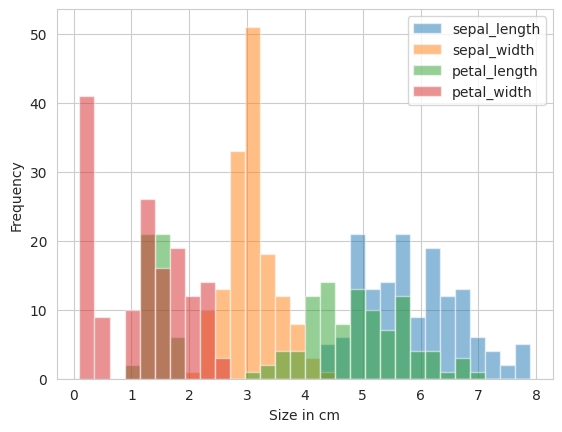

In [9]:
# importing packages
axis = dataset.plot.hist(bins=30, alpha=0.5)
axis.set_xlabel('Size in cm');





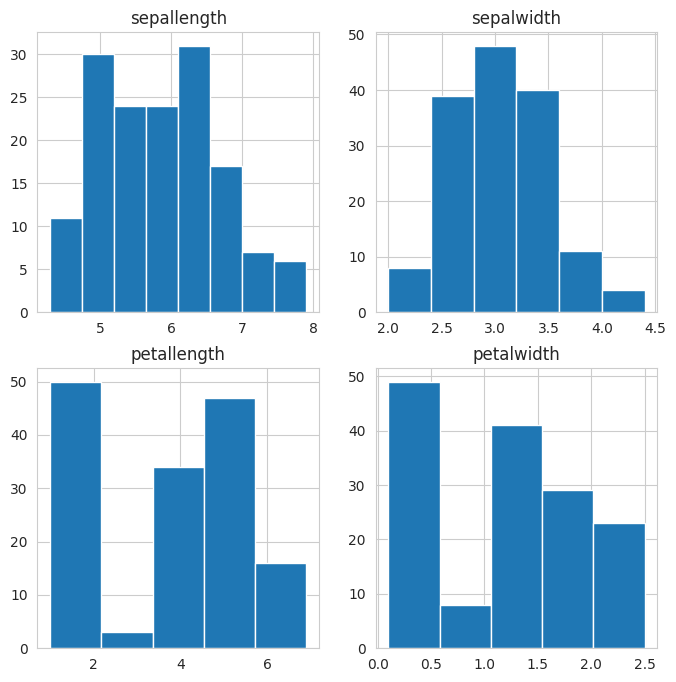

In [10]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("sepallength")
ax[0,0].hist(dataset['sepal_length'], bins=8)

ax[0,1].set_title("sepalwidth")
ax[0,1].hist(dataset['sepal_width'], bins=6);

ax[1,0].set_title("petallength")
ax[1,0].hist(dataset['petal_length'], bins=5);

ax[1,1].set_title("petalwidth")
ax[1,1].hist(dataset['petal_width'], bins=5);

In [ ]:
#From the above plot we can see that –
# - Sepal length highest freq lies between 5.5 cm to 6 cm which is 30-35 cm
# - Petal length highest freq lies between 1 cm to 2 cm which is 50 cm
# - Sepal width highest freq lies between 3 cm to 3.5 cm which is 70 cm
# - Petal width highest freq lies between 0 cm to 0.5 cm which is 40-45 cm